# Probability distribution problems

## Binomial distribution

In probability theory and statistics, the binomial distribution is the discrete probability distribution that gives only two possible results in an experiment; for example, when you flip a coin, it can be either head or tails.

In [80]:
from scipy.stats import binom, norm, uniform
from typing import Any
from numpy import dtype, ndarray

In [81]:

# Define all the probability functions related to this distribution
def dbinom(x, size: int, prob: float = 0.5) -> ndarray[Any, dtype[Any]]:
    """
    Calculates the point estimate of the binomial distribution
    """
    result: ndarray[Any, dtype[Any]] = binom.pmf(k = x, n = size, p = prob, loc = 0) # type: ignore

    return result

def pbinom(q, size: int, prob: float = 0.5) -> ndarray[Any, dtype[Any]]:
    """
    Calculates the cumulative of the binomial distribution
    """
    result: ndarray[Any, dtype[Any]] = binom.cdf(k = q, n = size, p = prob, loc = 0) # type: ignore

    return result

def qbinom(p: float, size: int, prob: float = 0.5) -> ndarray[Any, dtype[Any]]:
    """
    Calculates the quantile function from the binomial distribution
    """
    result: ndarray[Any, dtype[Any]] = binom.ppf(q = p, n = size, p = prob, loc = 0) # type: ignore

    return result

def rbinom(n: int, size: int, prob: float= 0.5) -> Any | int:
    """
    Generates random variables from the binomial distribution
    """
    result: Any | int = binom.rvs(n = size, p = prob, size = n) # type: ignore

    return result

In [82]:
# Binomial(10, 0.2) distribution, where n = 10 is the number of trials and p = 0.2 is the probability of success in a single trial
import numpy as np

np.random.seed(42)

print(f"Probability that a Binomial(10, 0.2) takes the value 2: {dbinom(2, size = 10, prob = 0.2)}")
print(f"Probability that a Binomial(10, 0.2) will take a value less than 2: {pbinom(2, size = 10, prob = 0.2)}")
print(f"Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? {qbinom(0.9, size = 10, prob = 0.2)}")
print(f"Generate 2000 random values from a Binomial(10, 0.2) distribution: {rbinom(2000, size = 10, prob = 0.2)}")

Probability that a Binomial(10, 0.2) takes the value 2: 0.30198988800000004
Probability that a Binomial(10, 0.2) will take a value less than 2: 0.6777995263999999
Which value of a Binomial(10, 0.2) has a cumulative probability of 0.9? 4.0
Generate 2000 random values from a Binomial(10, 0.2) distribution: [1 4 3 ... 0 0 1]


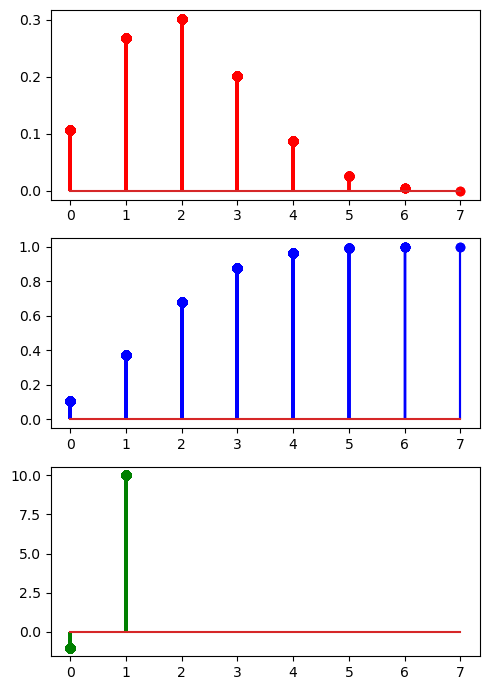

In [83]:
import matplotlib.pyplot as plt

np.random.seed(42)

size = 10
prob = 0.2
data: Any | int = rbinom(2000, size = 10, prob = 0.2) # type: ignore

pmf: ndarray[Any, dtype[Any]] = dbinom(data, size = size, prob = prob)
cdf: ndarray[Any, dtype[Any]] = pbinom(data, size = size, prob = prob)
ppf: ndarray[Any, dtype[Any]] = qbinom(data, size = size, prob = prob)

fig, axis = plt.subplots(3, 1, figsize = (5, 7))

axis[0].stem(data, pmf, "r-")
axis[1].stem(data, cdf, "b-")
axis[2].stem(data, ppf, "g-")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

## Exercise 1

Write the above functions but for both normal and uniform distributions.

In [84]:
# libraries used
import seaborn as sns
import pandas as pd
import numpy.typing as npt

In [85]:
# distribution population size
population_size = 5000

## Normal distribution

**Important**: the normal distribution does not have a mass probability function because it is continuous.

### Functions

In [86]:

# define the probability functions related to this distribution

def norm_cumulative_probability(x) -> ndarray[Any, dtype[Any]]:
    """
    Calculates the cumulative prob of the normal distribution
    
    Args:
		x (float): Value to calculate the cumulative prob.
        
    Returns:
		Probability of the normal distribution in the point x.
    """
    
    result: ndarray[Any, dtype[Any]] = norm.cdf(x=x)

    return result


def norm_percent_point_function(q: float) -> ndarray[Any, dtype[Any]]:
    """
    Calculates the percent point function of the norm function. 
    This is de inverse of CDF.
    It gives the value that corresponds to an accumulate probability.
	
    Args:
		q (float): Accumulate probability.
        
    Returns:
		It gives the value that corresponds to the q accumulate probability.
    """
    
    result: ndarray[Any, dtype[Any]] = norm.ppf(q = q)

    return result


def norm_random_variables(size: int) -> 'list[float]':
    """
    Generates random variables for the normal distribution
    
    Args:
		size (int): The size of the random variables to generate
        
    Returns:
		Variables that follow a normal distribution.
    """
    
    result: Any | int = norm.rvs(size = size) # verify if the element is 
    
	# verify if the result is a np array
    if isinstance(result, np.ndarray):
        return [float(item) for item in result]
    # verify if the result is just a float
    elif isinstance(result, (int, float)):
        return [float(result)]
    
    # if none of the types before return an empty list
    return []

### Graphing the data

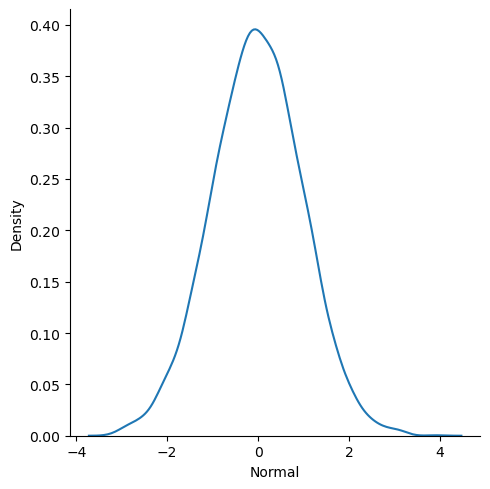

In [87]:
# get random variables following a normal distribution
norm_data = norm_random_variables(size=population_size)

# convert the data ro a pandas df
norm_data_df = pd.DataFrame(np.array(norm_data), columns = ["Normal"])

# graph the data
sns.displot(norm_data_df, x="Normal", kind="kde")

In [88]:
# print the results
print(f"Generate 1000 random values from a Normal distribution: {norm_data}")
print(f"Probability that a Normal distribution will take a value less than 0: {norm_cumulative_probability(x=0)}")
print(f"Value of X that have a cumulative probability of 0.5 in a Normal distribution: {norm_percent_point_function(q=0.5)}")


Generate 1000 random values from a Normal distribution: [-0.877982586756561, -0.82688035403986, -0.22647889190152676, 0.3673655068161781, 0.9135846262332494, -0.8031789506803448, 1.4926885689595217, -0.2711236010425688, -0.021367294348436157, -0.7472116791478234, -2.4242402602729416, 0.8840453963610497, 0.7368438970924334, -0.2813275571182134, 0.06699071722487192, 0.5159392177040995, -1.5625458568865427, -0.5290526773462948, 0.7942646796218271, -1.2542894231692494, 0.2935579321666293, -1.356581804623405, 0.46642998243352635, -0.03564148229748357, -1.6151318159055095, 1.1647393544571714, -0.7345915767980492, -0.810252437014381, 0.20056919723094285, 1.1486373494287152, -1.015821818978397, 0.06167984984797165, 0.42881650033057295, 0.6931056072631441, 0.1764415552772252, -0.3670278390833223, -0.8275902206487197, 0.08614388304637476, -1.072139011985607, -2.9213504834946074, 0.4365598041576678, 0.9039348410861953, -2.3629324355418384, -1.0097307047099375, 0.6191542610051978, 2.05749546971169

## Uniform distribution

**Important**: the uniform distribution does not have a mass probability function because it is continuous.

In [89]:

# define the probability functions related to this distribution

def uniform_cumulative_probability(x) -> ndarray[Any, dtype[Any]]:
    """
    Calculates the cumulative prob of the uniform distribution
    
    Args:
		x (float): Value to calculate the cumulative prob.
        
    Returns:
		Probability of the uniform distribution in the point x.
    """
    
    result: ndarray[Any, dtype[Any]] = uniform.cdf(x=x)

    return result


def uniform_percent_point_function(q: float) -> ndarray[Any, dtype[Any]]:
    """
    Calculates the percent point function of the uniform function. 
    This is de inverse of CDF.
    It gives the value that corresponds to an accumulate probability.
	
    Args:
		q (float): Accumulate probability.
        
    Returns:
		It gives the value that corresponds to the q accumulate probability.
    """
    
    result: ndarray[Any, dtype[Any]] = uniform.ppf(q = q)

    return result


def uniform_random_variables(size: int) -> 'list[float]':
    """
    Generates random variables for the uniform distribution
    
    Args:
		size (int): The size of the random variables to generate
        
    Returns:
		Variables that follow a uniform distribution.
    """
    
    result: Any | int = uniform.rvs(size = size) # verify if the element is 
    
	# verify if the result is a np array
    if isinstance(result, np.ndarray):
        return [float(item) for item in result]
    # verify if the result is just a float
    elif isinstance(result, (int, float)):
        return [float(result)]
    
    # if none of the types before return an empty list
    return []

### Graphing the data

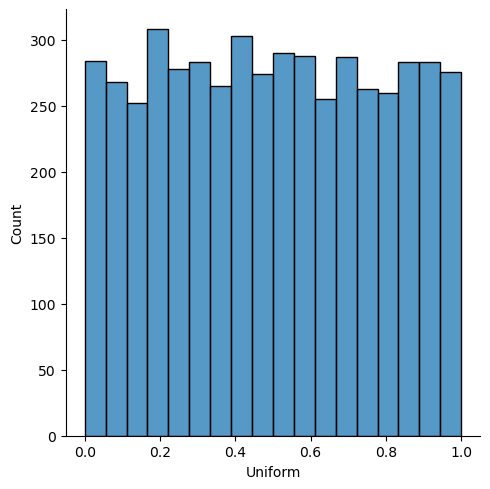

In [90]:
# get random variables following a normal distribution
uniform_data: list[float] = uniform_random_variables(size=population_size)

# convert the data ro a pandas df
uniform_data_df = pd.DataFrame(np.array(uniform_data), columns = ["Uniform"])

# graph the data
sns.displot(uniform_data_df, x="Uniform")

In [91]:
# print the results
print(f"Generate 2000 random values from a Uniform distribution: {norm_data}")
print(f"Probability that a Uniform distribution will take a value less than 0.5: {uniform_cumulative_probability(x=0.5)}")
print(f"Value of X that have a cumulative probability of 0.5 in an Uniform distribution: {uniform_percent_point_function(q=0.5)}")


Generate 2000 random values from a Uniform distribution: [-0.877982586756561, -0.82688035403986, -0.22647889190152676, 0.3673655068161781, 0.9135846262332494, -0.8031789506803448, 1.4926885689595217, -0.2711236010425688, -0.021367294348436157, -0.7472116791478234, -2.4242402602729416, 0.8840453963610497, 0.7368438970924334, -0.2813275571182134, 0.06699071722487192, 0.5159392177040995, -1.5625458568865427, -0.5290526773462948, 0.7942646796218271, -1.2542894231692494, 0.2935579321666293, -1.356581804623405, 0.46642998243352635, -0.03564148229748357, -1.6151318159055095, 1.1647393544571714, -0.7345915767980492, -0.810252437014381, 0.20056919723094285, 1.1486373494287152, -1.015821818978397, 0.06167984984797165, 0.42881650033057295, 0.6931056072631441, 0.1764415552772252, -0.3670278390833223, -0.8275902206487197, 0.08614388304637476, -1.072139011985607, -2.9213504834946074, 0.4365598041576678, 0.9039348410861953, -2.3629324355418384, -1.0097307047099375, 0.6191542610051978, 2.0574954697116